In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
prewitt = np.array([
    [-1, 0, 1],
    [-1,  0, 1],
    [-1, 0, 1]
])

prewitt2 = np.array([
    [-1, -1, -1],
    [0,  0, 0],
    [1, 1, 1]
])

sobel = np.array([
    [-1, 0, 1],
    [-2,  0, 2],
    [-1, 0, 1]
])

sobel2 = np.array([
    [-1, -2, -1],
    [0,  0, 0],
    [1, 2, 1]
])

f5 = np.array([
    [-1, -1, 0],
    [-1,  0, 1],
    [0, 1, 1]
])
if5 = np.array([
    [1, 1, 0],
    [1,  0, -1],
    [0, -1, -1]
])
f51 = np.array([
    [0, -1, -1],
    [1,  0, -1],
    [1, 1, 0]
])
if51 = np.array([
    [0, 1, 1],
    [-1,  0, 1],
    [-1, -1, 0]
])

eke=     np.array([
    [0, 0, 0],
    [0,  0, 1],
    [0, 1, 0]
])

blur=np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25, 0.125],
    [0.0625, 0.125, 0.0625]
])
edge_dec = np.array([
    [0, -1, 0],
    [-1, 0, 1],
    [0, 1, 0]
])

grad_2 = np.array([
    [-1/6, 0, 1/6],
    [-1/6, 0, 1/6],
    [-1/6, 0, 1/6]
])

equis =     np.array([
    [0, 255, 0],
    [255,  255, 255],
    [0, 255, 0]
])

equis =     np.array([
    [0, 255, 0],
    [255,  255, 255],
    [0, 255, 0]
])

ele =     np.array([
    [0, 255, 0],
    [0,  255, 255],
    [0, 0, 0]
])

elei =     np.array([
    [0, 255, 0],
    [255,  255, 0],
    [0, 0, 0]
])
mte =     np.array([
    [0, 0, 0],
    [0,  255, 255],
    [0, 255, 0]
])
mtei =     np.array([
    [0, 0, 0],
    [255,  255, 0],
    [0, 255, 0]
])

tei =     np.array([
    [0, 255, 0],
    [255,  255, 255],
    [0, 0, 0]
])

te =     np.array([
    [0, 0, 0],
    [255,  255, 255],
    [0, 255, 0]
])
equis_2 =     np.array([
    [255, 0, 255],
    [0,  255, 0],
    [255, 0, 255]
])
dia =     np.array([
    [255, 0, 0],
    [0,  255, 0],
    [255, 0, 0]
])

dia_2 =     np.array([
    [0, 0, 255],
    [0,  255, 0],
    [0, 0, 255]
])



In [4]:
def GetBI(image):
    biggerImage = np.zeros((image.shape[0]+2, image.shape[1]+2))
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            biggerImage[i][j] = image[i-1][j-1]
    return biggerImage
def targetSize(N, kernel_N):
    pixels = 0

    for i in range(N):
        aux = i + kernel_N
        if aux <= N: pixels += 1
            
    return pixels

def convolve(img, kernel):
    k = kernel.shape[0]
    xSize = targetSize(img.shape[0], k)
    ySize = targetSize(img.shape[1], k)
    

    convolved = np.zeros(shape=(xSize, ySize))
    
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            
            mat = img[i-1:i+2, j-1:j+2]
            convolved[i-1, j-1] = np.sum(np.multiply(mat, kernel))
            
    return convolved

In [5]:
def morphologicalOperatorDE(img, eroIt, dilIt):
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    
    kernelErode = np.ones((5, 5), np.uint8)
    kernelDilate = np.ones((3, 3), np.uint8)
    invert = cv2.bitwise_not(img) 


    dilosion = cv2.dilate(invert, kernelErode, iterations = dilIt)
    erosion = cv2.erode(dilosion, kernelDilate, iterations = eroIt)

    return erosion
def morphologicalOperatorED(img, eroIt, dilIt):
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    
    kernelErode = np.ones((5, 5), np.uint8)
    kernelDilate = np.ones((3, 3), np.uint8)
    invert = cv2.bitwise_not(img) 

    erosion = cv2.erode(invert, kernelDilate, iterations = eroIt)
    dilosion = cv2.dilate(erosion, kernelErode, iterations = dilIt)
    

    return dilosion

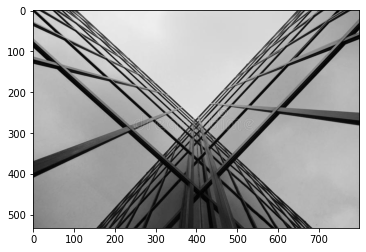

In [6]:
image = cv2.imread("./edificio.jpeg", 0)
plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

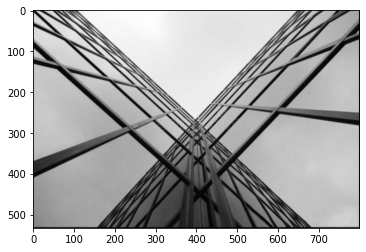

In [7]:
big_image=GetBI(image)
image_blur=convolve(big_image,blur)
plt.figure()
plt.imshow(image_blur, cmap='gray')
plt.show()

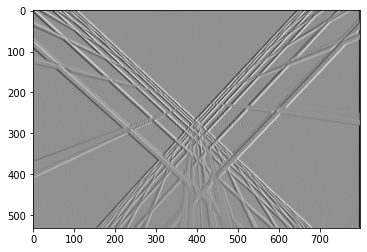

In [8]:
image_gradx=convolve(image_blur,prewitt)
plt.figure()
plt.imshow(image_gradx, cmap='gray')
plt.show()

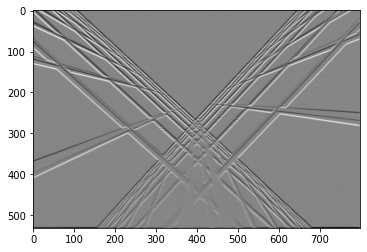

In [9]:
image_grady=convolve(image_blur,prewitt2)
plt.figure()
plt.imshow(image_grady, cmap='gray')
plt.show()

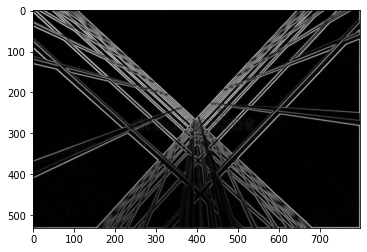

In [10]:
image_grad=np.absolute(image_gradx)+np.absolute(image_grady)
plt.figure()
plt.imshow(image_grad, cmap='gray')
plt.show()

In [25]:
k = 0.5
detA = image_gradx * image_grady - image_grad ** 2
# trace
traceA = image_gradx + image_grady
harris_response = detA - k * traceA ** 2

In [21]:
print(harris_response)

[[-1.36171875e+01 -1.74410156e+02 -6.96486328e+03 ... -5.78160449e+04
  -2.11643209e+05 -1.78764723e+05]
 [-6.31607422e+02 -2.66308594e+01 -2.24739844e+03 ... -2.10633750e+04
  -1.82439844e+05 -1.80873844e+05]
 [-2.17233633e+04 -6.61795312e+03 -2.69589844e+01 ... -2.10633750e+04
  -1.82439844e+05 -1.80873844e+05]
 ...
 [-3.17413418e+04 -1.33264199e+04 -1.23964121e+04 ... -8.26817871e+04
  -3.08106334e+05 -2.62145270e+05]
 [-1.28657555e+05 -1.14296303e+05 -1.12000219e+05 ... -3.08369209e+05
  -3.93401250e+05 -2.26205719e+05]
 [-1.11524443e+05 -1.13629770e+05 -1.12237891e+05 ... -2.62472396e+05
  -2.26205719e+05 -9.83503125e+04]]


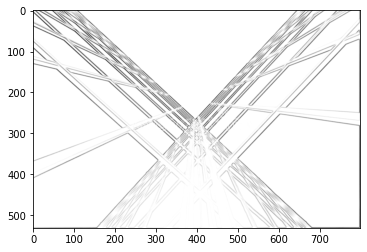

In [28]:
plt.figure()
plt.imshow(harris_response, cmap='gray')
plt.show()

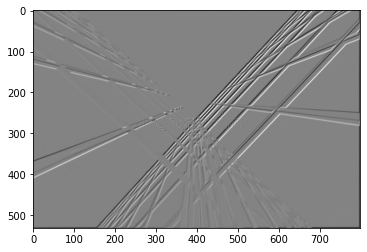

In [12]:
image_gradf=convolve(image_blur,edge_dec)
plt.figure()
plt.imshow(image_gradf, cmap='gray')
plt.show()

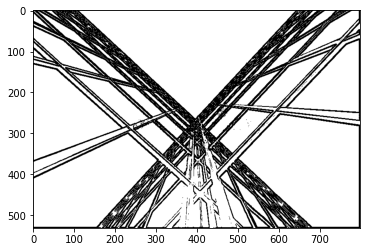

In [13]:
threshold = image_grad < 60

plt.figure()
plt.imshow(threshold, cmap='gray')
plt.show()

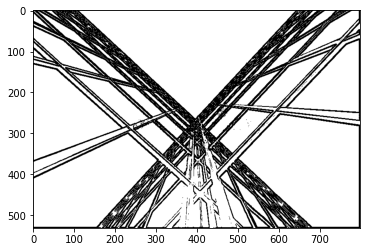

In [14]:
#threshold = image_gradf < 50

plt.figure()
plt.imshow(threshold, cmap='gray')
plt.show()

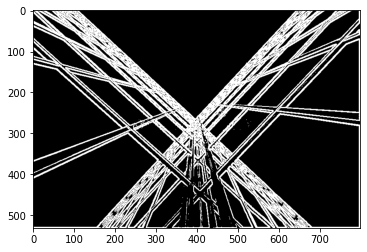

In [15]:
borders=morphologicalOperatorED(threshold.astype("uint8"),0,0)
plt.figure()
plt.imshow(borders, cmap='gray')
plt.show()

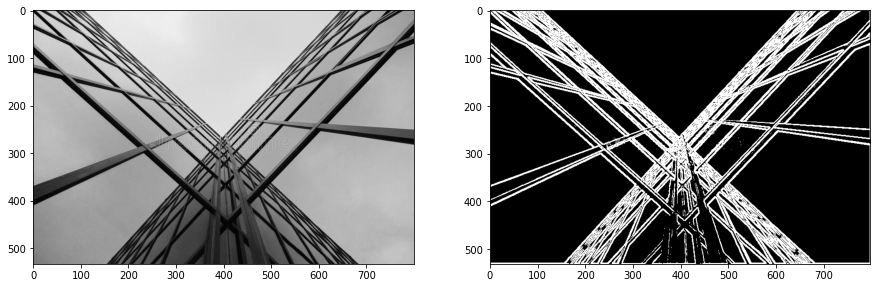

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(borders, cmap='gray')
plt.show()

### Rafael Andrade, José Luis Lobera, José Miguel de la Mora

## Canny proposal

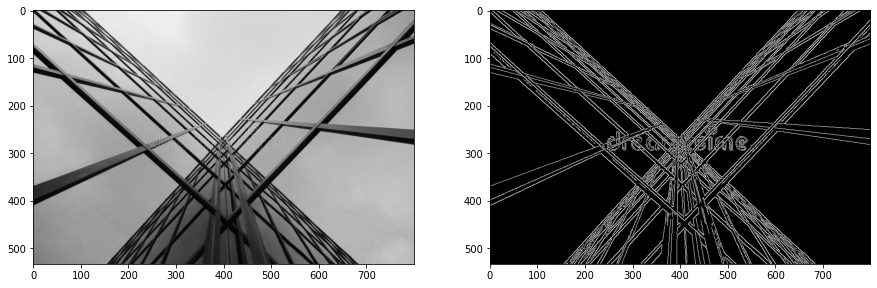

In [17]:
alt=cv2.Canny(image,60,120)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(alt, cmap='gray')
plt.show()

## Comparison

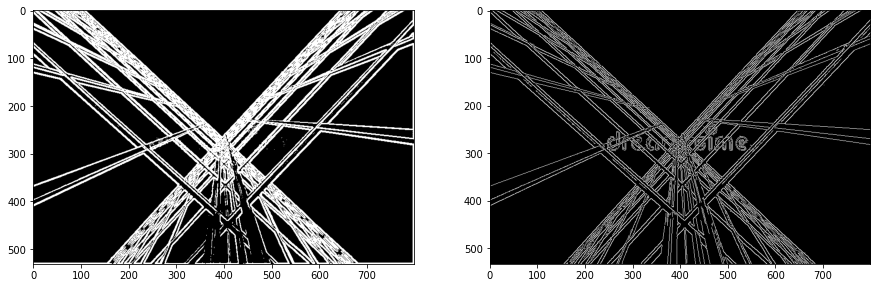

In [18]:
alt=cv2.Canny(image,60,120)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(borders, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(alt, cmap='gray')
plt.show()

In [19]:
def FindKernel(img, kernel,binary_matrix):
    
    
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            
            mat = img[i-1:i+2, j-1:j+2]
            if mat==kernel:
                binary_matrix[i, j] = 255
            
    return binary_matrix